In [7]:

import numpy as np 
import pandas as pd 
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt

In [8]:
train_df = pd.read_csv('../dataset/train.csv')
features_df = pd.read_csv('../dataset/features.csv')
stores_df = pd.read_csv('../dataset/stores.csv')
test_df = pd.read_csv('../dataset/test.csv')
submission_df = pd.read_csv('../dataset/sampleSubmission.csv')

In [9]:
dataset = train_df.merge(stores_df, how='left').merge(features_df, how='left')
test_dataset = test_df.merge(stores_df, how='left').merge(features_df, how='left')

In [10]:
dataset.shape

(421570, 16)

In [11]:
dataset.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [12]:
dataset.describe()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,136727.915739,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289
std,12.785297,30.492054,22711.183519,60980.583328,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296
min,1.000000,1.000000,-4988.940000,34875.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000
25%,11.000000,18.000000,2079.650000,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000
50%,22.000000,37.000000,7612.030000,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000
75%,33.000000,74.000000,20205.852500,202505.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000
max,45.000000,99.000000,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000


In [13]:
dataset.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

In [14]:
dataset.shape

(421570, 16)

In [15]:
dataset.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment'],
      dtype='object')

In [16]:
test_dataset.columns

Index(['Store', 'Dept', 'Date', 'IsHoliday', 'Type', 'Size', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment'],
      dtype='object')

In [17]:
dataset.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

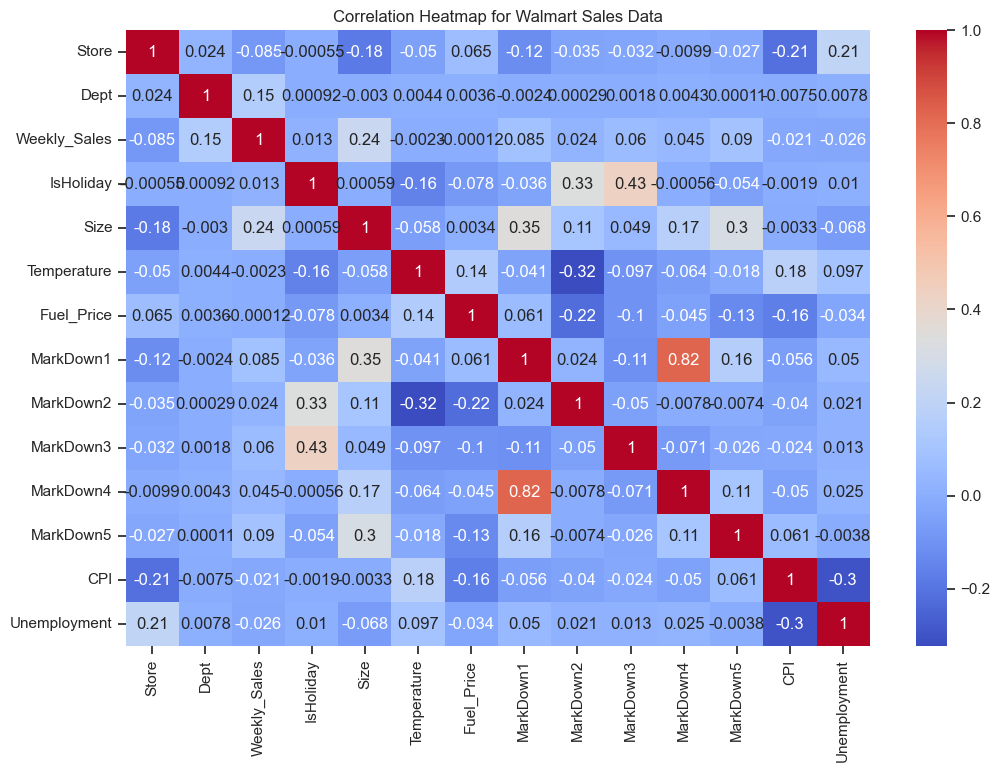

In [18]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = dataset.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap for Walmart Sales Data")
plt.show()

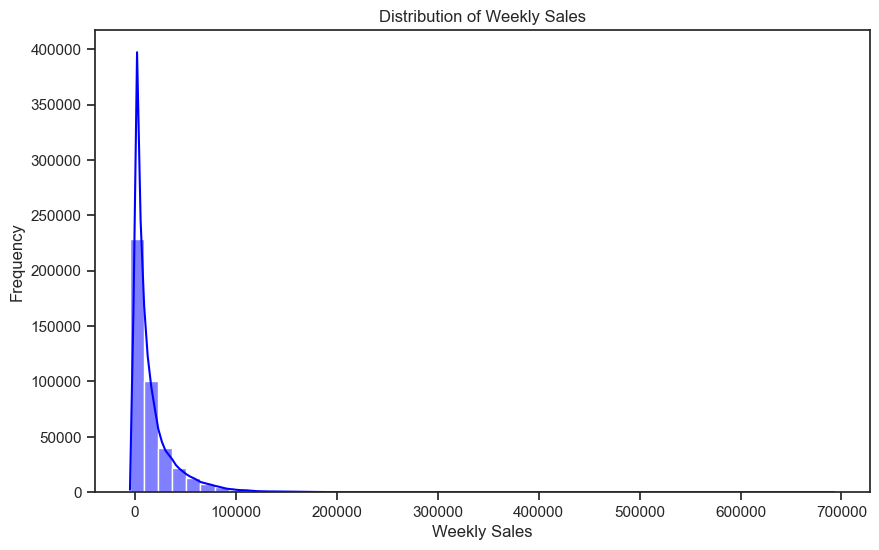

In [19]:
# Distribution of Weekly Sales
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Weekly_Sales'], bins=50, kde=True, color='blue')
plt.title("Distribution of Weekly Sales")
plt.xlabel("Weekly Sales")
plt.ylabel("Frequency")
plt.show()

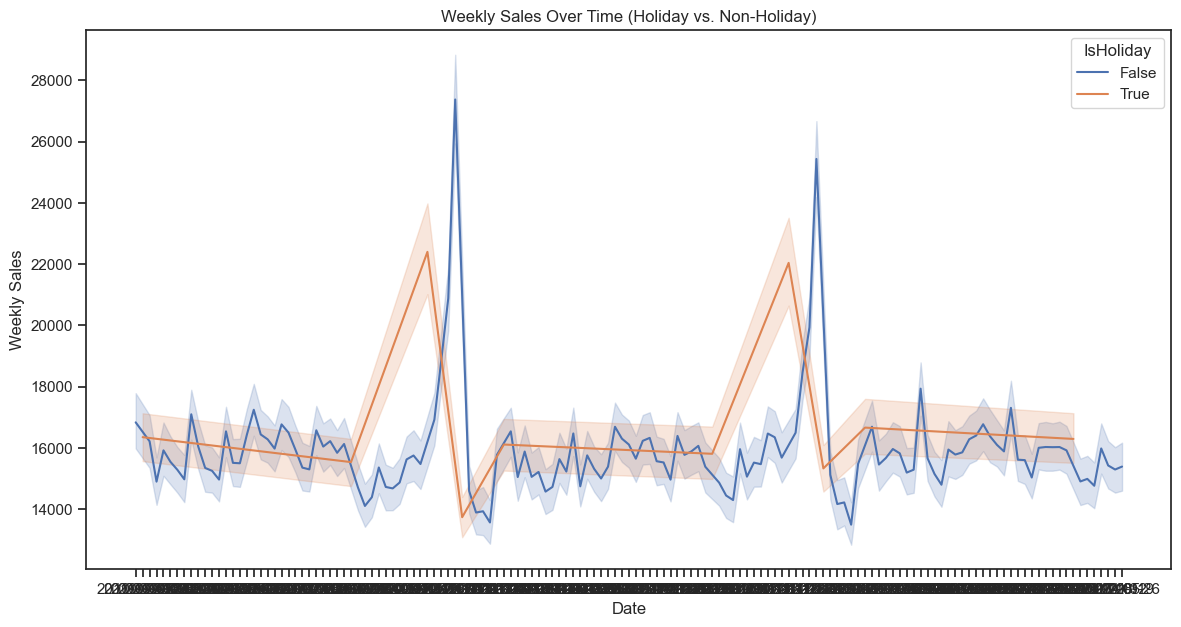

In [20]:
# Sales over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=dataset, x='Date', y='Weekly_Sales', hue='IsHoliday')
plt.title("Weekly Sales Over Time (Holiday vs. Non-Holiday)")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend(title='IsHoliday')
plt.show()

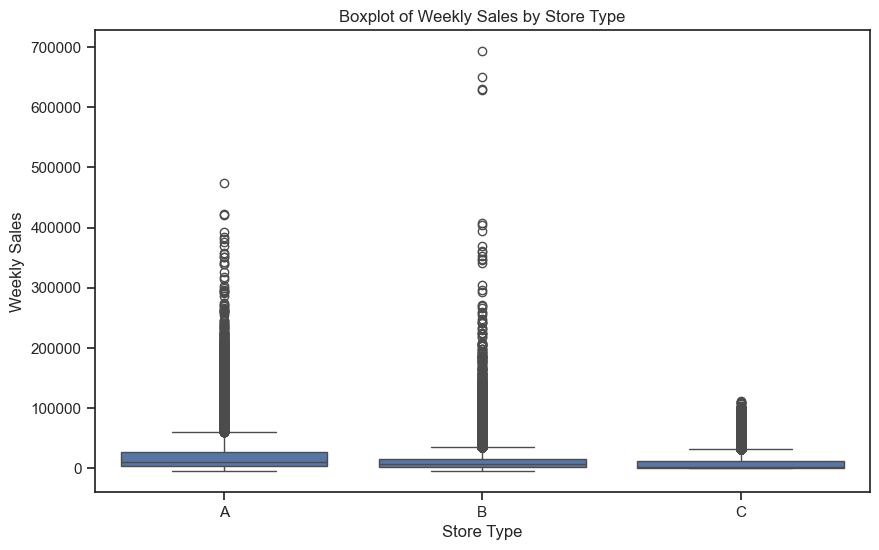

In [21]:
#Sales by Store Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Weekly_Sales', data=dataset)
plt.title("Boxplot of Weekly Sales by Store Type")
plt.xlabel("Store Type")
plt.ylabel("Weekly Sales")
plt.show()

/var/folders/77/xl1bx_sj1nqc214dbq2jptrw0000gp/T/ipykernel_95748/2073244553.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dept', y='Weekly_Sales', data=dept_sales, palette='viridis')


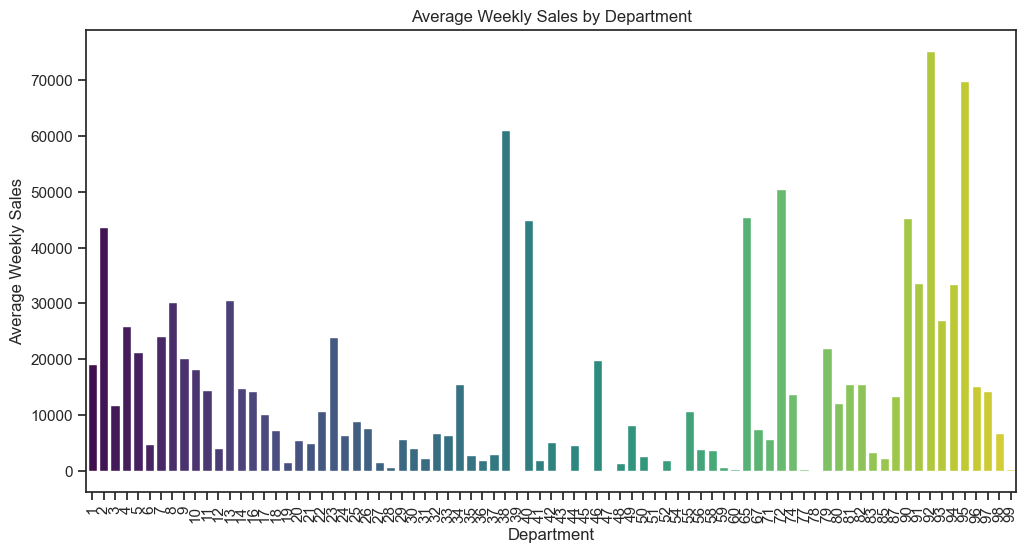

In [22]:
# Average Sales by Department
dept_sales = dataset.groupby('Dept')['Weekly_Sales'].mean().reset_index().sort_values(by='Weekly_Sales', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='Dept', y='Weekly_Sales', data=dept_sales, palette='viridis')
plt.title("Average Weekly Sales by Department")
plt.xlabel("Department")
plt.ylabel("Average Weekly Sales")
plt.xticks(rotation=90)
plt.show()

In [23]:
# Ensure that the Date column is in datetime format
dataset['Date'] = pd.to_datetime(dataset['Date'], errors='coerce')

# Now add the Year and Month columns
dataset['Year'] = dataset['Date'].dt.year
dataset['Month'] = dataset['Date'].dt.month


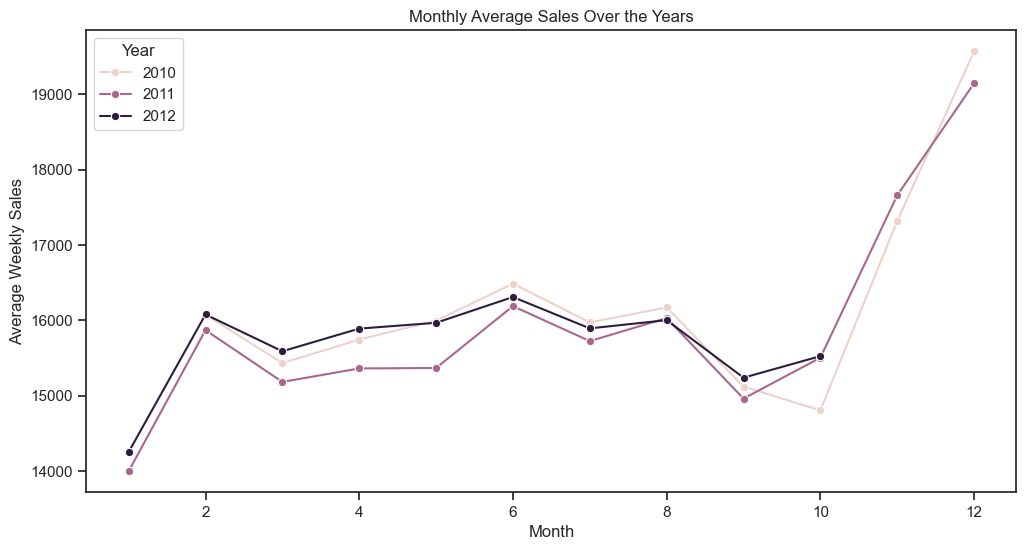

In [24]:
# Grouped sales by year and month
plt.figure(figsize=(12, 6))
monthly_sales = dataset.groupby(['Year', 'Month'])['Weekly_Sales'].mean().reset_index()
sns.lineplot(data=monthly_sales, x='Month', y='Weekly_Sales', hue='Year', marker='o')
plt.title("Monthly Average Sales Over the Years")
plt.xlabel("Month")
plt.ylabel("Average Weekly Sales")
plt.show()

In [25]:

numerical_columns = dataset.select_dtypes(include=['float64', 'int64']).columns

outliers_dict = {}

for col in numerical_columns:
    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find outliers in the column
    outliers = dataset[(dataset[col] < lower_bound) | (dataset[col] > upper_bound)]
    if not outliers.empty:
        outliers_dict[col] = outliers[col]
        

for col, outliers in outliers_dict.items():
    print(f"Outliers in {col}:")
    print(outliers)
    print("\n")


Outliers in Weekly_Sales:
8         57258.43
46        55931.23
63        50510.31
106       54060.10
113       57592.12
            ...   
421285    49380.11
421286    50241.01
421287    49334.77
421288    48434.97
421289    56017.47
Name: Weekly_Sales, Length: 35521, dtype: float64


Outliers in Temperature:
59052   -2.06
59195   -2.06
59338   -2.06
59481   -2.06
59624   -2.06
         ... 
68120   -2.06
68243   -2.06
68386   -2.06
68529   -2.06
68670   -2.06
Name: Temperature, Length: 69, dtype: float64


Outliers in MarkDown1:
104       34577.06
117       21290.13
130       27584.78
134       21442.73
247       34577.06
            ...   
421519    23052.25
421531    35348.47
421535    22832.38
421557    24853.05
421561    23641.30
Name: MarkDown1, Length: 9712, dtype: float64


Outliers in MarkDown2:
92         6115.67
99        46011.38
100       21813.16
101        8025.87
105        6927.23
            ...   
421528    11219.72
421532     6113.95
421533     7421.99
421534     5

In [26]:
# Removing outliers based on IQR for a specific column
Q1 = dataset['Weekly_Sales'].quantile(0.25)
Q3 = dataset['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
dataset = dataset[(dataset['Weekly_Sales'] >= lower_bound) & (dataset['Weekly_Sales'] <= upper_bound)]



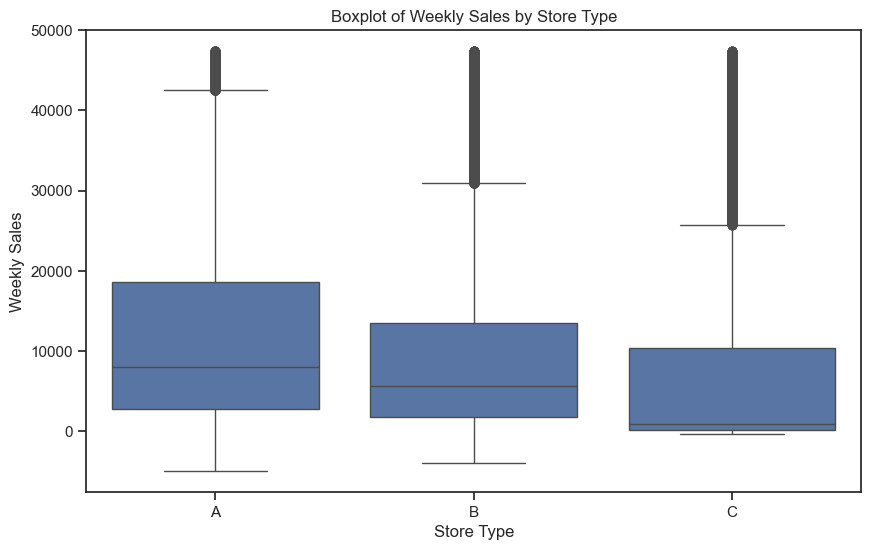

In [27]:
#now after removing outliar again plotingthe box plot graph just tu be sure outliar got removed
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Weekly_Sales', data=dataset)
plt.title("Boxplot of Weekly Sales by Store Type")
plt.xlabel("Store Type")
plt.ylabel("Weekly Sales")
plt.show()